In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Load dataset
dataset = pd.read_csv('/content/drive/MyDrive/heart_disease_data.csv')  # Replace with actual path if needed

In [4]:
print(dataset.head())  # Display first few rows

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
# Define features (X) and target (y)
X = dataset.drop(columns=['target'])  # Remove the target column from features
y = dataset['target']  # Define the target variable

In [6]:
# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Standardize the feature values (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Train Logistic Regression Model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Predict the test set results
predictions = logistic.predict(X_test)

In [10]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [13]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

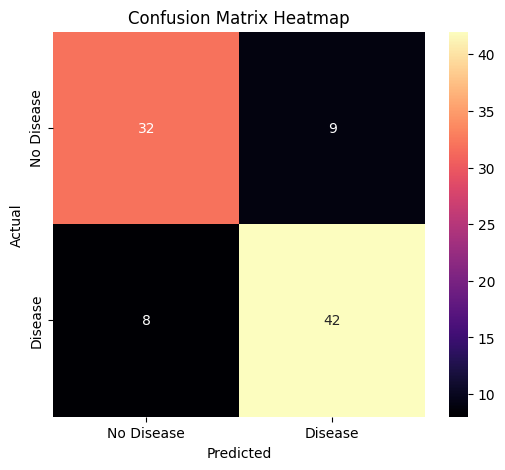

In [14]:
# Visualizing Confusion Matrix with Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="magma", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [18]:
def predict(X, weights):
    return sigmoid(np.dot(X, weights))

In [19]:
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [20]:
weights = np.zeros(X_train_bias.shape[1])

In [21]:
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [22]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, weights))
        gradient = (1/m) * np.dot(X.T, (h - y))
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return weights, cost_history

In [23]:
learning_rate = 0.01
iterations = 1000

In [24]:
weights, cost_history = gradient_descent(X_train_bias, y_train, weights, learning_rate, iterations)

Iteration 0: Cost 0.6897631543046998
Iteration 100: Cost 0.498564475113802
Iteration 200: Cost 0.43074228393233494
Iteration 300: Cost 0.39796992465695175
Iteration 400: Cost 0.37893530237098855
Iteration 500: Cost 0.36657755980328954
Iteration 600: Cost 0.35794956589928917
Iteration 700: Cost 0.3516136415543417
Iteration 800: Cost 0.34678661298224056
Iteration 900: Cost 0.34300549837240946


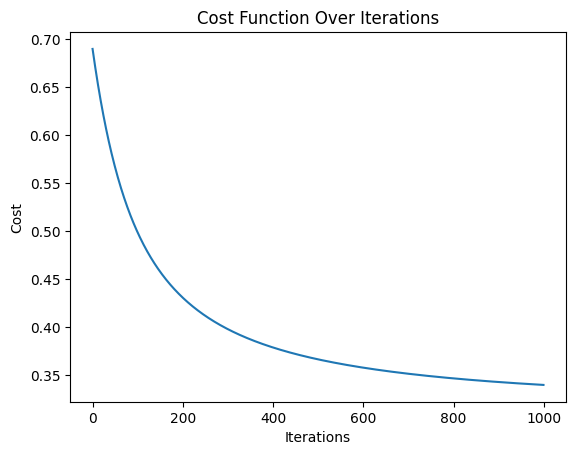

In [25]:
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Over Iterations")
plt.show()

In [26]:
y_pred_proba = sigmoid(np.dot(X_test_bias, weights))
y_pred = (y_pred_proba >= 0.5).astype(int)